In [23]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

UC3MAL201 Machine Learning Session 7 Activity sheet 7 Leon Eriksen Helgeland -
First written 02.09.2020

# Classification - Support Vector Machines

## Objective
In this notebook, you will use SVM (Support Vector Machines) to build and train a
model using human cell records, and classify cells to whether the samples are
benign or malignant.

### Dataset Desc
Class: 2 = bening, 4 = malignant

In [24]:
dataset_file_name = 'dataset7.csv'
dataset_directory = 'dataset'

## TASK 1 (Data pre-processing)
### 1. Load the dataset.

In [25]:
dataframe = pd.read_csv(f'{dataset_directory}/{dataset_file_name}')
df = dataframe

### 2. It looks like the ‘BareNuc' column includes some values that are not numerical. We can drop those rows.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [27]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [65]:
df.head(2)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [29]:
df['BareNuc'].value_counts() # did not show bc of object

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [64]:
# counter = 0
# for rows in df.row:
#     print(line)
#     counter += 1
#     if counter > 10:
#         break
# 

indexes = [] # Index collection list
for index, row in df.iterrows(): # Iterating all the rows (Not recommended for large datasets)
    try:
        if not row['BareNuc'].isnumeric(): # If the column contains a value/object that is not numerical
            # print(index, row['BareNuc'],'1')
            indexes.append(index) # Collecting index of rows with object data
    except:
        print('Error during index collection')


df = df.drop(indexes) # Drops the rows we collected that had an object in them
df = df.astype('int64') # Set the data type of the dataframe to be integers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 84.0 KB


In [66]:
print(len(indexes))

16


The procedure removes the rows with an object datatype entry. In total there was 16 rows that got dropped.

-------------------------------------------------------------------------------------------------------------

### 3. We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [71]:
df.loc[:, 'Class'].replace([2, 4], [0, 1], inplace=True) # Replaces the values of 2 and 4 with 0 and 1 in the 'Class column'

### 4. Split the dataset into train and test set

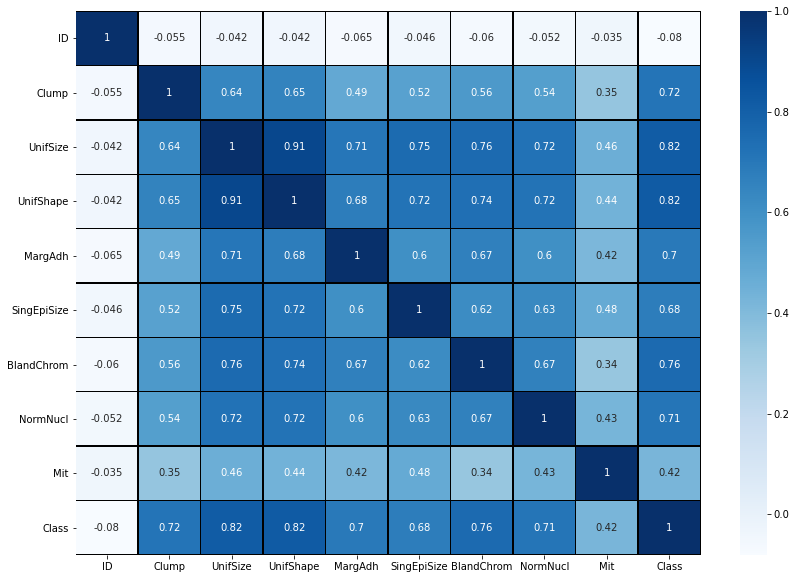

In [72]:
# some exploration
correlation = df.corr()
plt.subplots(figsize=(14, 10))
sns.heatmap(correlation, linecolor='black', linewidth=0.5, annot=True, cmap='Blues')

In [74]:
y = df['Class']
X = df.loc[:, df.columns != 'Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## TASK 2 (Model development)
